# Data Analyst Professional Practical Exam Submission

## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation

In [71]:
#reading data set
library(tidyverse)
df <- read.csv("product_sales.csv")
head(df)
glimpse(df)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
1,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NA,0,24,Arizona
2,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
3,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NA,3,25,Indiana
5,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
6,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi


Rows: 15,000
Columns: 8
$ week              <int> 2, 6, 5, 4, 3, 6, 4, 1, 5, 5, 3, 2, 5, 2, 5, 4, 2, 6…
$ sales_method      <chr> "Email", "Email + Call", "Call", "Email", "Email", "…
$ customer_id       <chr> "2e72d641-95ac-497b-bbf8-4861764a7097", "3998a98d-70…
$ nb_sold           <int> 10, 15, 11, 11, 9, 13, 11, 10, 11, 11, 9, 9, 11, 10,…
$ revenue           <dbl> NA, 225.47, 52.55, NA, 90.49, 65.01, 113.38, 99.94, …
$ years_as_customer <int> 0, 1, 6, 3, 0, 10, 9, 1, 10, 7, 4, 2, 2, 1, 1, 2, 6,…
$ nb_site_visits    <int> 24, 28, 26, 25, 28, 24, 28, 22, 31, 23, 28, 23, 30, …
$ state             <chr> "Arizona", "Kansas", "Wisconsin", "Indiana", "Illino…


In [72]:
#validation and cleaning steps for every column in the data
table(is.na(df))
## week
table(df$week)
table(is.na(df$week))



 FALSE   TRUE 
118926   1074 


   1    2    3    4    5    6 
3721 2491 2411 2575 2574 1228 


FALSE 
15000 

In [73]:
## sales method
table(is.na(df$sales_method))
table(df$sales_method)



FALSE 
15000 


        Call    em + call        email        Email Email + Call 
        4962           23           10         7456         2549 

In [74]:
#change sales method
df$sales_method[df$sales_method =="email"] <- "Email"
df$sales_method[df$sales_method == "em + call"] <- "Email + Call"
table(df$sales_method)


        Call        Email Email + Call 
        4962         7466         2572 

In [75]:
## customer_id 
table(is.na(df$customer_id))
sum(duplicated(df$customer_id))


FALSE 
15000 

[1] 0

In [76]:
## nb_sold
table(is.na(df$nb_sold))  
df  %>%  filter(nb_sold < 0)  %>%  count()


FALSE 
15000 

n
<int>
0


In [77]:
## revenue 
table(is.na(df$revenue))  



FALSE  TRUE 
13926  1074 

In [78]:
#change revenue
df<- df %>%
  group_by(sales_method) %>%
  mutate(revenue = ifelse(is.na(revenue), mean(revenue, na.rm = TRUE), revenue)) %>%
  ungroup()
table(is.na(df$revenue))



FALSE 
15000 

In [79]:
## years_as_customer
table(is.na(df$years_as_customer))
df  %>% 
 filter(years_as_customer > 2025- 1984 | years_as_customer < 0)


FALSE 
15000 

week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
<int>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [80]:
## change years_as_customer
df$years_as_customer[df$years_as_customer > 40] <- 40
df  %>% 
 filter(years_as_customer > 2025- 1984 | years_as_customer < 0)  %>% 
count()

n
<int>
0


In [81]:
## nb_sites_visits
table(is.na(df$nb_site_visits))
df %>% filter(nb_site_visits < 0) %>% count()


FALSE 
15000 

n
<int>
0


In [82]:
## state
table(is.na(df$state))
table(unique(df$state))
sum(table(unique(df$state)))


FALSE 
15000 


       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              1              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              1              1              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              1              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              1              1              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1              1              1              1              1 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             1              1              1              1              1 
    New Mexico       New York North Carolina   North Dakota           Ohio 
           

[1] 50

## Resume of Data Validation
This dataset contains 15,000 rows and 8 columns. During the data cleaning process, we identified 1,074 missing (NA) values. The following outlines the cleaning steps performed for each column:
###  Week :
The week column is free of missing values (NA), duplicates, or erroneous entries. Therefore, no modifications were needed for this column.
### Sales_Method :
The sales_method column is free of missing values (NA), but it contains 5 unique values due to typographical errors such as "email" and "em + call". These will be corrected by standardizing the values to: "Email", "Call", and "Email + Call" to ensure consistency.
### Customer_id :
The customer_id column is free of missing values (NA) and duplicates. No changes are required at this time.
### nb_sold :
The nb_sold column is free of missing values (NA) or negative values. No changes were necessary for this column.
### revenue :
A total of 1,074 missing (NA) values were found in the revenue column. To handle this, we decided to impute these missing values by replacing them with the mean revenue corresponding to each sales_method.
### years_as_customer :
The years_as_customer column is free of missing values (NA), but two entries were found with values exceeding the maximum possible number of years for the company (47 and 63 years). These were identified as data entry errors and corrected by setting these values to 40 years, representing the number of years the company has been in operation as of 2025.
### nb_site_visits :
The nb_site_visits column is free of missing values (NA) and no negative or zero values. Therefore, no changes were made to this column.
### state :
 The state column is free of missing values (NA) and includes all 50 U.S. states, with no duplicates. This column does not require any modifications.

# Exploratory Analysis

## Sales Method Counts

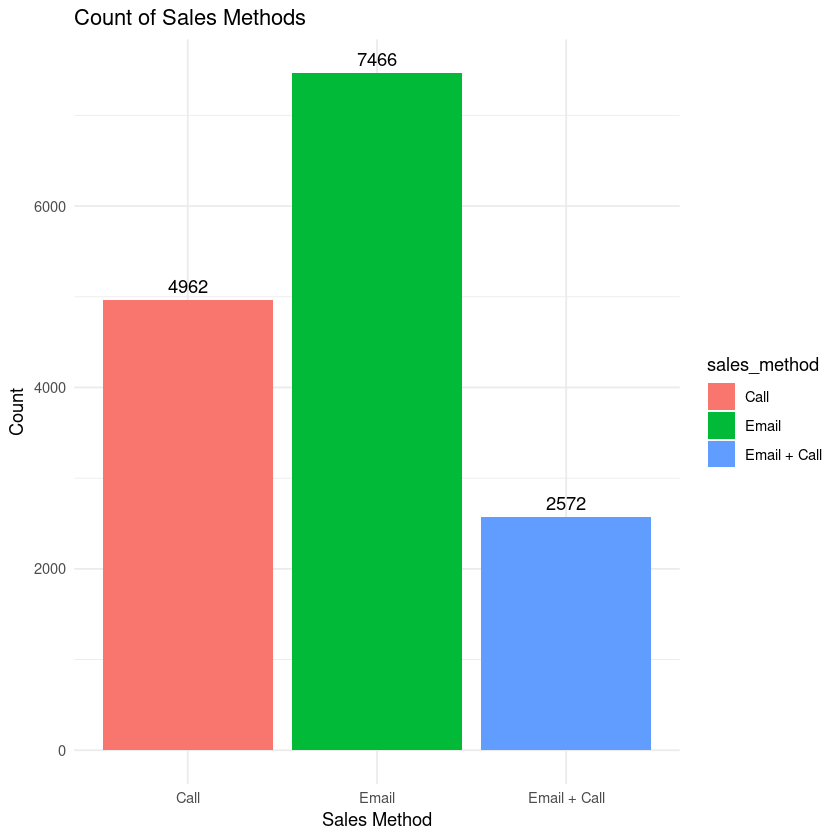

In [83]:
df %>% 
  ggplot(aes(x = sales_method, fill = sales_method)) +
  geom_bar() +
  geom_text(aes(label = after_stat(count)), stat = "count", vjust = -0.5) +
  labs(title = "Count of Sales Methods", x = "Sales Method", y = "Count") +
  theme_minimal() 

The number of customers per sales approach is as follows: 7466 for Email, 4962 for Call, and 2,572 for Email + Call

## Revenue Distribution and Spread


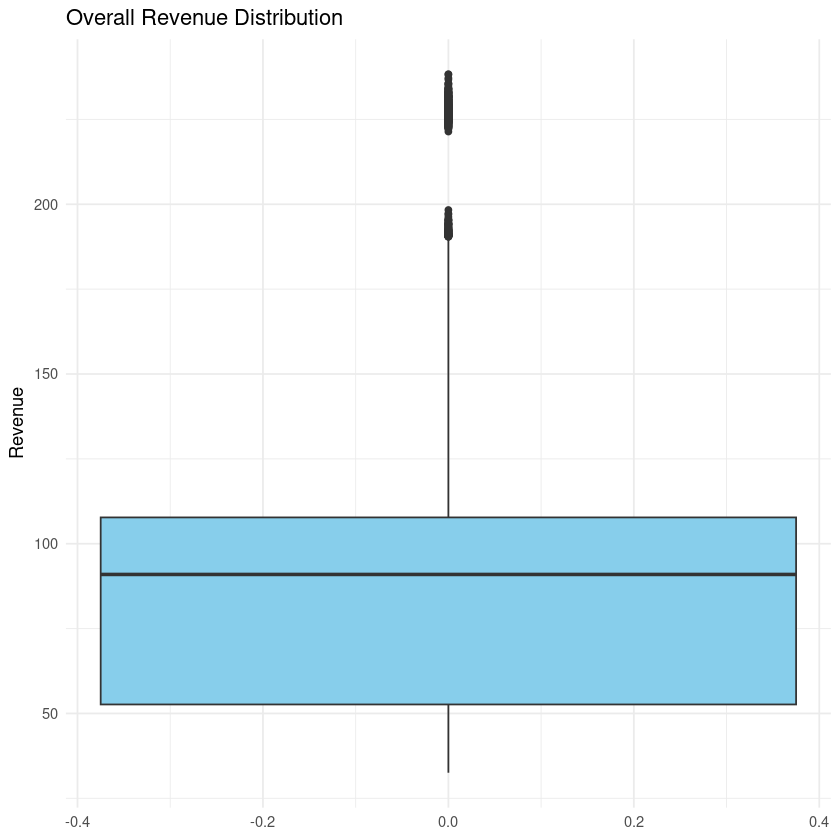

In [84]:
df %>% 
  ggplot(aes(y = revenue)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Overall Revenue Distribution", y = "Revenue") +
  theme_minimal()

The overall spread of revenue shows that most customers generate between 5000 and 110 dollars. The median revenue is around 90–95 dollars, a few high-revenue customers stand out as outliers above 200 dollars. This indicates that, overall, revenue is somewhat right-skewed due to a small number of high-value transactions.

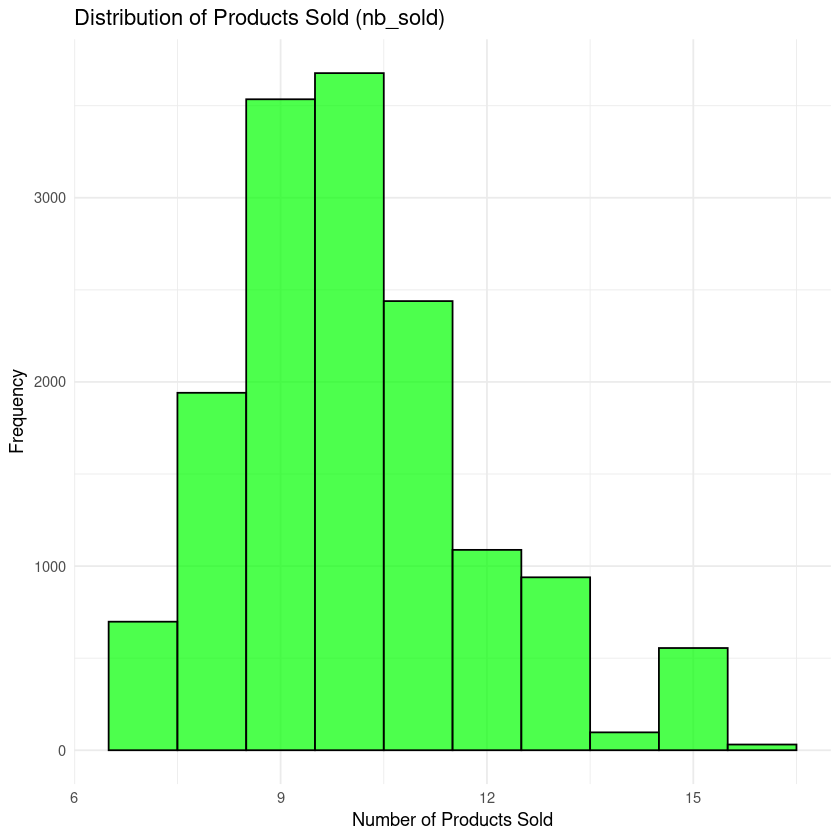

In [85]:
df %>%
  ggplot(aes(x = nb_sold)) + 
  geom_histogram(binwidth=1, fill = "green", color = "black", alpha = 0.7) + 
  labs(
    title = "Distribution of Products Sold (nb_sold)",
    x = "Number of Products Sold",
    y = "Frequency"
  ) + 
  theme_minimal()


The chart shows that the majority of sales are concentrated around 9 products, with a decrease in frequency as the number of products sold increases. This suggests that customers generally prefer moderate purchases rather than very small or large quantities.

## Total Revenue by Sales Method

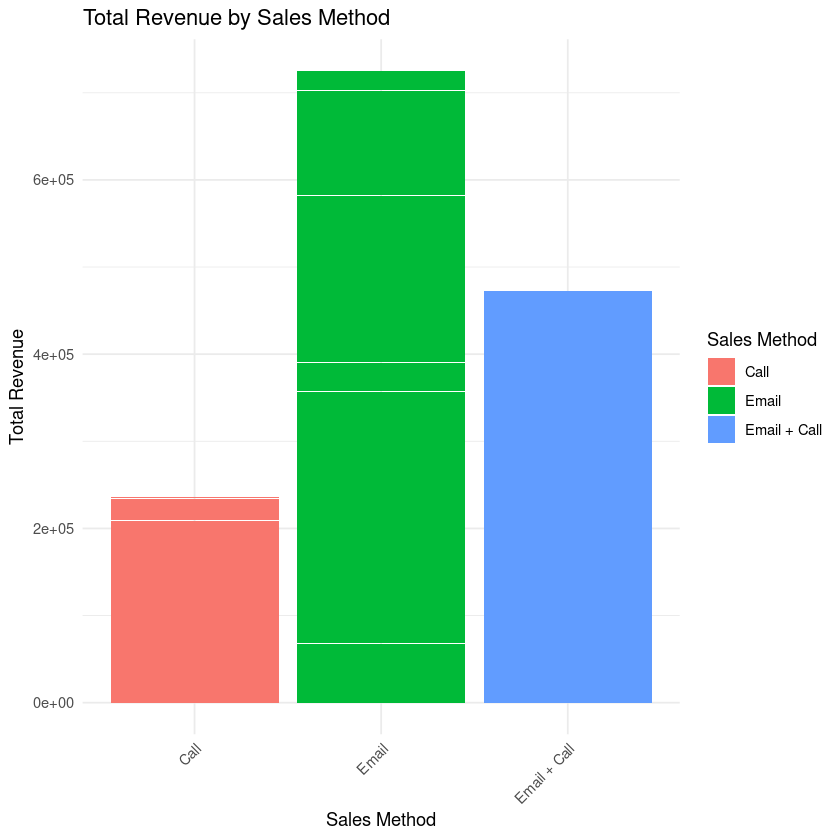

In [86]:
df %>% 
  ggplot(aes(x = sales_method, y = revenue, fill = sales_method)) +
  geom_col() + 
  labs(
    title = "Total Revenue by Sales Method",
    x = "Sales Method",
    y = "Total Revenue",
    fill = "Sales Method"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 



The Email method generated the highest total revenue. Following this, the combined Email + Call method also contributed significantly, though to a lesser extent than Email. Lastly, the Call method produced the lowest revenue, indicating a more limited impact compared to the other two methods.

## Revenue Trends Over Time by Sales Method

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


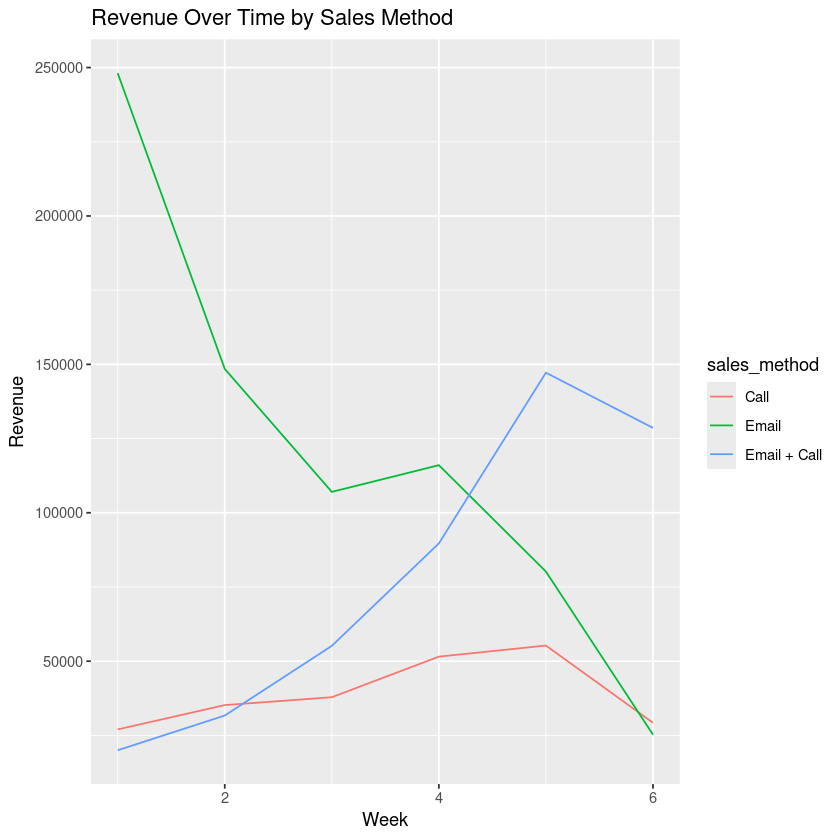

In [87]:

df %>%
  group_by(week, sales_method) %>%
  summarise(revenue = sum(revenue))  %>% 
ggplot(aes(x = week, y = revenue, color = sales_method)) + 
  geom_line() + 
  labs(title = "Revenue Over Time by Sales Method", x = "Week", y = "Revenue")


There were differences in revenue trends over time for each method. The Email method generated high revenue initially but declined steadily as the weeks progressed, showing short-term effectiveness. The Email + Call method demonstrated consistent growth over the weeks, peaking mid-period, making it the most balanced and sustainable option. Meanwhile, the Call method remained steady but with moderate revenue throughout, indicating limited but predictable performance. Overall, the Email + Call approach stood out for sustained revenue generation.

## Revenue Distribution Across Sales Methods

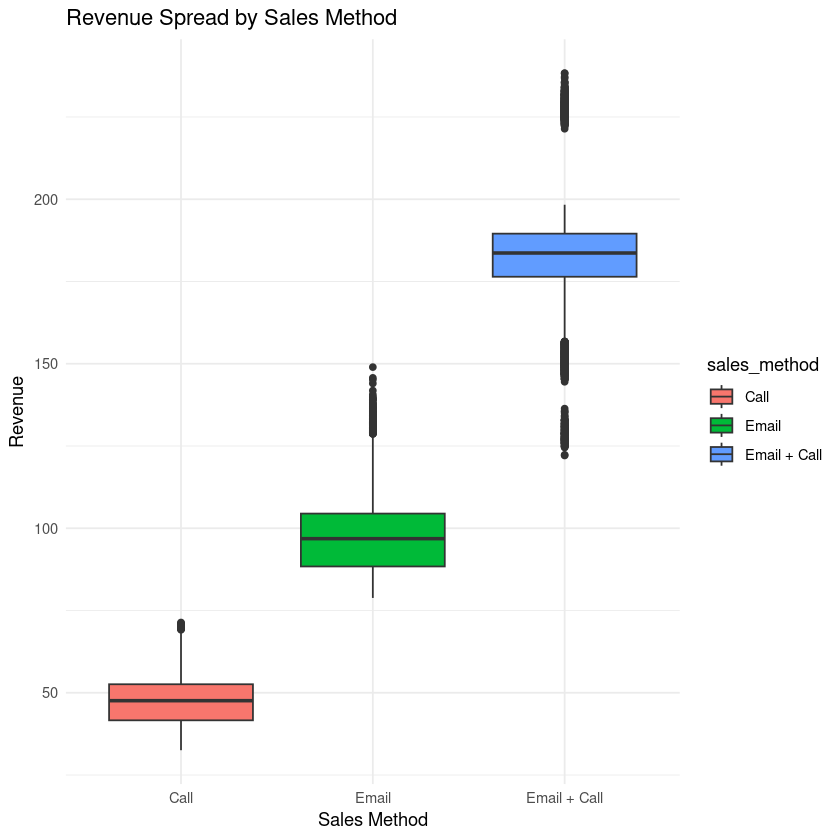

In [88]:
# Boxplot de ingresos por cada método de venta
df %>%
  ggplot(aes(x = sales_method, y = revenue, fill = sales_method)) + 
  geom_boxplot() + 
  labs(
    title = "Revenue Spread by Sales Method",
    x = "Sales Method",
    y = "Revenue"
  ) + 
  theme_minimal()


The Email + Call method shows the highest variability and the widest revenue range, with a significantly higher median compared to the other methods. The Email method ranks second, with higher median revenue than Call but less dispersion. Lastly, the Call method has the lowest revenue.

# Business Metric

## Percentage of total revenue generated by the 'Email + Call' sales method over 6 weeks

In [89]:
df %>%
  group_by(sales_method) %>%
  summarise(total_revenue = sum(revenue, na.rm = TRUE)) %>%
  mutate(percentage = round(100 * total_revenue / sum(total_revenue), 2)) %>%
  arrange(desc(percentage))



sales_method,total_revenue,percentage
<chr>,<dbl>,<dbl>
Email,725155.3,50.58
Email + Call,472351.0,32.95
Call,236178.6,16.47


## Estimate initial value

Based on the current data, the starting value of this metric is 32.95%, representing the revenue generated by the Email + Call method over the last 6 weeks

Since we aim to determine the best sales method, Email + Call has shown an increase over the weeks, reaching 32.95% revenue in 6 weeks. If this value continues to grow over the next 6 weeks, it will indicate a positive trend and strengthen the case for this method as a reliable and effective approach

# Conclusion and Recommendations

- The Email method generated the highest revenue initially, but its performance declined as weeks progressed,  indicating a lack of sustainability. In contrast, Email + Call was the only method that consistently increased its revenue over time, demonstrating growth potential and stability. Meanwhile, the Call method performed the worst, showing minimal revenue and failing to improve, making it the least viable option.
- At the start, Email required less effort and yielded high revenue, making it the most efficient method. However, as time went on, its revenue dropped drastically, highlighting its limitations in long-term consistency. On the other hand, Email + Call required slightly more effort, but proved to be the more sustainable option—its revenue continued increasing over time, indicating that investment in this method could lead to better long-term results.
- Tracking these metrics every 6 weeks will help confirm if trends persist and guide future decisions.
- Since it performed the worst, it may not be worth the investment unless it can be restructured for better results.
- The Email + Call method shows consistent revenue growth. Investing in optimizing this strategy could result in sustainable business success.


